In [1]:
import os 
import sys
import random
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt
import json
import pydicom
from imgaug import augmenters as iaa
from tqdm import tqdm_notebook
import pandas as pd 
import glob 
import seaborn as sns
%matplotlib inline

In [2]:
TRAIN = 'F:/DC/肝癌影像AI诊断/train_dataset'
LABEL ='F:/DC/肝癌影像AI诊断/train_label.csv'
TEST = 'F:/DC/肝癌影像AI诊断/test_dataset'

In [3]:
#train_dicom_dir = os.path.join(DATA_DIR, 'train_dataset/00C1E256-E3F7-431D-BCB6-DD1EF09E7DFE')
#test_dicom_dir = os.path.join(DATA_DIR, 'stage_2_test_images')

In [4]:
TRAIN_path1=sorted(list({f for f in os.listdir(TRAIN)}))
TEST_path1=sorted(list({f for f in os.listdir(TEST)}))

In [5]:
len(TRAIN_path1)

3600

In [6]:
len(TEST_path1)

3974

In [7]:
train_df =pd.read_csv(LABEL,engine="python",encoding='gb18030').rename(columns={'锘縤d':'id'})
train_df.head()

,id,ret
0,0013EDC2-8D7A-4A41-AEB5-D3BB592306D2,1
1,0030CBD1-2472-42C4-8CE4-E01A4E8E2F09,1
2,0036DF08-EEEC-467C-8CF1-5A54E0B13CE8,1
3,003D2553-266F-47E3-A420-F5B8F95217A7,0
4,0072E2C1-C395-409B-8078-365DD5C0513E,0


In [8]:
a=list()
for i in TRAIN_path1:
    b= glob.glob(TRAIN+'/'+i+'/'+'*.dcm')
    b=list(set(b))
    c=[dcm for dcm in b]
    a.append(c)

In [9]:
test_li=list()
for i in TEST_path1:
    t= glob.glob(TEST+'/'+i+'/'+'*.dcm')
    t=list(set(t))
    t1=[dcm for dcm in t]
    test_li.append(t1)

In [10]:
%time
t2=[i for j in test_li for i in j]

Wall time: 0 ns


In [11]:
e=[i for j in a for i in j]

In [12]:
df= sorted(e)

In [13]:
df_target =sorted(t2)

In [14]:
len(df_target)

224370

In [15]:
train_df['ret'].value_counts()

0    2100
1    1500
Name: ret, dtype: int64

In [16]:
train_df.head()

,id,ret
0,0013EDC2-8D7A-4A41-AEB5-D3BB592306D2,1
1,0030CBD1-2472-42C4-8CE4-E01A4E8E2F09,1
2,0036DF08-EEEC-467C-8CF1-5A54E0B13CE8,1
3,003D2553-266F-47E3-A420-F5B8F95217A7,0
4,0072E2C1-C395-409B-8078-365DD5C0513E,0


In [17]:
import time

In [18]:
%time
id_li=list()
for i in range(3600):
    if int(train_df.loc[i].ret)==1:
        id_li.append(train_df.loc[i].id)

Wall time: 0 ns


In [19]:
len(id_li)

1500

In [20]:
%time
a1= list()
for i in TRAIN_path1:
    if i in id_li:
        b1= glob.glob(TRAIN+'/'+i+'/'+'*.dcm')
        b1=list(set(b1))
        c1=[dcm for dcm in b1]
        a1.append(c1)    

Wall time: 0 ns


In [21]:
len(a1)

1500

In [22]:
e1=[i for j in a1 for i in j]

In [23]:
len(e1)

72788

In [24]:
%%time
id1_li=list()
for i in range(3600):
    if int(train_df.loc[i].ret)==0:
        id1_li.append(train_df.loc[i].id)

Wall time: 669 ms


In [25]:
len(id1_li)

2100

In [26]:
%%time
a2= list()
for i in TRAIN_path1:
    if i in id1_li:
        b2= glob.glob(TRAIN+'/'+i+'/'+'*.dcm')
        b2=list(set(b2))
        c2=[dcm for dcm in b2]
        a2.append(c2)    

Wall time: 2.83 s


In [27]:
e2=[i for j in a2 for i in j]

In [28]:
len(e2)+len(e1)

180900

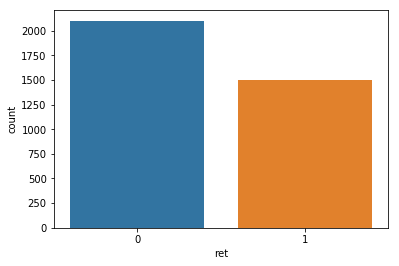

In [29]:
sns.countplot(train_df['ret'])
plt.show()

In [30]:
import random

(-0.5, 511.5, 511.5, -0.5)

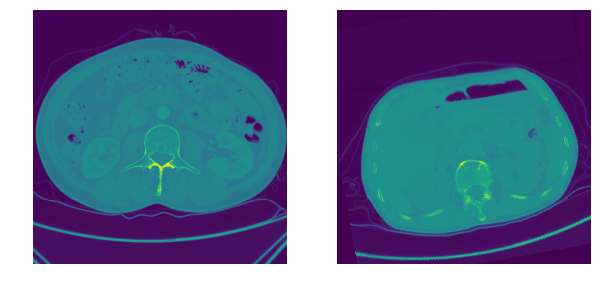

In [31]:
rand1 =  random.randint(0,len(df))
ds = pydicom.read_file(df[rand1]) # read dicom image from filepath 
image1 = ds.pixel_array
rand2 =  random.randint(0,len(df))
ds = pydicom.read_file(df[rand2]) # read dicom image from filepath 
image2 = ds.pixel_array
plt.figure(figsize=(10, 20))
plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(image2)
plt.axis('off')

In [32]:
train_df.head()

,id,ret
0,0013EDC2-8D7A-4A41-AEB5-D3BB592306D2,1
1,0030CBD1-2472-42C4-8CE4-E01A4E8E2F09,1
2,0036DF08-EEEC-467C-8CF1-5A54E0B13CE8,1
3,003D2553-266F-47E3-A420-F5B8F95217A7,0
4,0072E2C1-C395-409B-8078-365DD5C0513E,0


In [33]:
target1 = np.zeros(len(e1))
target2 = np.zeros(len(e2))

In [34]:
target1 =pd.DataFrame(target1,columns={'id'})
target2 =pd.DataFrame(target2,columns={'id'})    

In [35]:
target1['id']=e1
target2['id']=e2

In [36]:
target1['ret']=1
target2['ret']=0

In [37]:
target=pd.concat([target1,target2])

In [38]:
target.shape

(180900, 2)

In [39]:
target.head()

,id,ret
0,F:/DC/肝癌影像AI诊断/train_dataset/0013EDC2-8D7A-4A4...,1
1,F:/DC/肝癌影像AI诊断/train_dataset/0013EDC2-8D7A-4A4...,1
2,F:/DC/肝癌影像AI诊断/train_dataset/0013EDC2-8D7A-4A4...,1
3,F:/DC/肝癌影像AI诊断/train_dataset/0013EDC2-8D7A-4A4...,1
4,F:/DC/肝癌影像AI诊断/train_dataset/0013EDC2-8D7A-4A4...,1


In [40]:
target.shape

(180900, 2)

In [41]:
from tqdm import tqdm_notebook

In [42]:
df[0][int(len(TRAIN))+1:120]

'0013EDC2-8D7A-4A41-AEB5-D3BB592306D2\\31aaeef6-f90f-4cfc-b406-9fc9d2f56b2f_00001.dcm'

In [43]:
len('0013EDC2-8D7A-4A41-AEB5-D3BB592306D2')

36

In [44]:
#target['id1']=target['id'].apply(lambda x:x[int(len(TRAIN))+1:int(len(TRAIN))+37])
#target['id2']=target['id'].apply(lambda x:x[int(len(TRAIN))+38:120])

In [45]:
#train_df['id'].index.values

In [46]:
target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180900 entries, 0 to 108111
Data columns (total 2 columns):
id     180900 non-null object
ret    180900 non-null int64
dtypes: int64(1), object(1)
memory usage: 4.1+ MB


In [47]:
#list(target['id1'].value_counts())

In [48]:
#target['id1'].values.isin([k for k in train_df['id1'].values ])

In [49]:
#sep ={j:k for j,k in zip(train_df['id'],train_df['ret'])}

In [50]:
 #target[target['id1']=='0013EDC2-8D7A-4A41-AEB5-D3BB592306D2'].ret.value=1

In [51]:
#target['id1'].apply(lambda x:train_df.loc[i].ret if x==j else x for i,j in enumerate(list(train_df['id'].values)) )

In [52]:
train_x = target['id'].values
train_Y=target['ret'].values

In [53]:
len(train_x)

180900

(-0.5, 511.5, 511.5, -0.5)

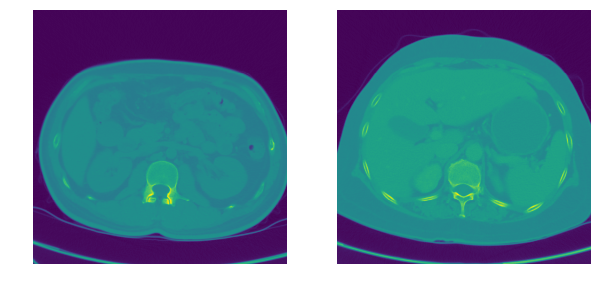

In [54]:
rand1 =  random.randint(0,len(train_x))
ds = pydicom.read_file(train_x[rand1]) # read dicom image from filepath 
image1 = ds.pixel_array
rand2 =  random.randint(0,len(train_x))
ds = pydicom.read_file(train_x[rand2]) # read dicom image from filepath 
image2 = ds.pixel_array
plt.figure(figsize=(10, 20))
plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(image2)
plt.axis('off')

In [55]:
image1.shape

(512, 512)

In [56]:
image = np.stack((image1,) * 3, -1)

In [57]:
image.shape

(512, 512, 3)

In [58]:
import cv2

In [59]:
im = cv2.resize(image1,(128,128))
im = np.stack((im,) * 3, -1)
im = np.divide(im, 255)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 127.5, 127.5, -0.5)

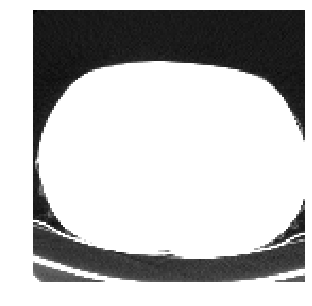

In [60]:
plt.figure(figsize=(5, 5))
plt.imshow(im)#.astype(np.uint8))
plt.axis('off')

In [61]:
from sklearn.model_selection import train_test_split, KFold

In [62]:
train_x = target['id'].values[0:3000]
train_Y=target['ret'].values[0:3000]

In [63]:
x_tr, x_val, y_tr, y_val = train_test_split(train_x, train_Y, shuffle=True, test_size=0.20, random_state=2019)

In [64]:
import gc
del train_x
del train_Y
gc.collect()

11597

In [65]:
train_X =np.array(x_tr)
traget_Y=np.array(y_tr)

In [66]:
train_X.shape

(2400,)

In [67]:
def load_image(path):
        ds = pydicom.read_file(path)
        image = ds.pixel_array
        # If grayscale. Convert to RGB for consistency.
        
        image = cv2.resize(image, (192, 192))
        #image = np.divide(image, 255)
        #if len(image.shape) != 3 or image.shape[2] != 3:
           # image = np.stack((image,) * 3, -1)
        return image

In [68]:
def prepareImages(data):
    print("Preparing images")
    X_train = np.zeros((data.shape[0],192, 192))
    for count,path in enumerate(data):
        #load images into images of size 100x100x3
        img = load_image(path)
        X_train[count] = img
        if (count%1000 == 0):
            print("Processing image: ", count+1, ", ", path)
        #count += 1
    
    return X_train

In [69]:
import gc
gc.collect()

0

In [70]:
import warnings
warnings.filterwarnings("ignore")

In [71]:
%%time
X_train = prepareImages(train_X)

Preparing images
Processing image:  1 ,  F:/DC/肝癌影像AI诊断/train_dataset/05B538DF-9A20-4AC3-BFDB-03954C81B03F\0972ed6d-9422-495f-8ba8-02d1c583e823_00036.dcm
Processing image:  1001 ,  F:/DC/肝癌影像AI诊断/train_dataset/0113A22C-CDC6-48F9-ADC2-F2D38EA5FC90\2b8c293e-a8cf-4ce9-aa6e-e702ea9cbb11_00194.dcm
Processing image:  2001 ,  F:/DC/肝癌影像AI诊断/train_dataset/0273E2EA-FD32-4194-B126-153D7EB6F217\6cfb7461-fcbc-4afb-b9c8-b88dfd3a1f24_00038.dcm
Wall time: 33.8 s


In [72]:
X_train= np.stack((X_train,) * 3, -1) 

In [73]:
#X_train_F=pd.DataFrame(X_train)

In [74]:
#X_train.to_csv('F:/DC/X_train_F.csv',index=False)

In [75]:
gc.collect()

0

In [78]:
%%time
X_val = prepareImages(x_val)

Preparing images
Processing image:  1 ,  F:/DC/肝癌影像AI诊断/train_dataset/04AF24F8-A948-495E-924F-4DB9330DA06C\4e927648-8688-47f3-b157-4fa7d6fcd274_00061.dcm
Wall time: 11 s


In [79]:
X_val= np.stack((X_val,) * 3, -1) 

In [80]:
X_val.shape

(600, 192, 192, 3)

In [81]:
import gc
gc.collect()

0

In [82]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model, Model
from keras.layers import Activation, Dropout, Flatten, Dense, Input, Conv2D, MaxPooling2D, BatchNormalization, Concatenate, ReLU, LeakyReLU
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
from keras import metrics
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras import backend as K
import keras
import tensorflow as tf

from tensorflow import set_random_seed
set_random_seed(2019)

Using TensorFlow backend.


In [83]:
def create_model(input_shape):
    
    dropRate = 0.25
    
    init = Input(input_shape)
    x = BatchNormalization(axis=-1)(init)
    x = Conv2D(8, (3, 3))(x)
    x = ReLU()(x)
    x = BatchNormalization(axis=-1)(x)
    x = Conv2D(8, (3, 3))(x)
    x = ReLU()(x)
    x = BatchNormalization(axis=-1)(x)
    x = Conv2D(16, (3, 3))(x)
    x = ReLU()(x)
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(dropRate)(x)
    c1 = Conv2D(16, (3, 3), padding='same')(x)
    c1 = ReLU()(c1)
    c2 = Conv2D(16, (5, 5), padding='same')(x)
    c2 = ReLU()(c2)
    c3 = Conv2D(16, (7, 7), padding='same')(x)
    c3 = ReLU()(c3)
    c4 = Conv2D(16, (1, 1), padding='same')(x)
    c4 = ReLU()(c4)
    x = Concatenate()([c1, c2, c3, c4])
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(dropRate)(x)
    x = Conv2D(32, (3, 3))(x)
    x = ReLU()(x)
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(dropRate)(x)
    x = Conv2D(64, (3, 3))(x)
    x = ReLU()(x)
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(dropRate)(x)
    x = Conv2D(128, (3, 3))(x)
    x = ReLU()(x)
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(dropRate)(x)
    #x = Conv2D(256, (1, 1), activation='relu')(x)
    #x = BatchNormalization(axis=-1)(x)
    #x = MaxPooling2D(pool_size=(2, 2))(x)
    #x = Dropout(0.25)(x)
    x = Flatten()(x)
    x = Dropout(0.5)(x)
    x = Dense(256)(x)
    x = ReLU()(x)
    x = BatchNormalization(axis=-1)(x)
    x = Dropout(0.1)(x)
    x = Dense(1)(x)
    x = Activation('sigmoid')(x)
    
    model = Model(init, x)
    
    return model

In [84]:
BATCH_SIZE = 128
SEED = 777
SHAPE = (192, 192, 3)
DIR = '../input'
VAL_RATIO = 0.1 
THRESHOLD = 0.05

In [85]:
model = create_model(SHAPE)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(1e-03),
    metrics=['acc'])

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 192, 192, 3)  0                                            
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 192, 192, 3)  12          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 190, 190, 8)  224         batch_normalization_1[0][0]      
__________________________________________________________________________________________________
re_lu_1 (ReLU)                  (None, 190, 190, 8)  0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_norm

max_pooling2d_5 (MaxPooling2D)  (None, 4, 4, 128)    0           batch_normalization_8[0][0]      
__________________________________________________________________________________________________
dropout_5 (Dropout)             (None, 4, 4, 128)    0           max_pooling2d_5[0][0]            
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 2048)         0           dropout_5[0][0]                  
__________________________________________________________________________________________________
dropout_6 (Dropout)             (None, 2048)         0           flatten_1[0][0]                  
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          524544      dropout_6[0][0]                  
__________________________________________________________________________________________________
re_lu_11 (

In [86]:
tg =X_train 
vg =traget_Y 

# https://keras.io/callbacks/#modelcheckpoint
checkpoint = ModelCheckpoint('F:/DC/base.model', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='min', period=1)
reduceLROnPlato = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, mode='min')

In [87]:
print(tg.shape)
print(vg.shape)
print(X_val.shape)
print(y_val.shape)

(2400, 192, 192, 3)
(2400,)
(600, 192, 192, 3)
(600,)


In [88]:
history = model.fit(tg, vg, epochs=10, batch_size=32, verbose=1,validation_data=(X_val, y_val),
                    callbacks=[checkpoint,reduceLROnPlato])

Train on 2400 samples, validate on 600 samples
Epoch 1/10
2400/2400 [==============================] - ETA: 5:50 - loss: 0.9995 - acc: 0.500 - ETA: 2:58 - loss: 0.8846 - acc: 0.515 - ETA: 2:01 - loss: 0.8410 - acc: 0.541 - ETA: 1:32 - loss: 0.8377 - acc: 0.531 - ETA: 1:14 - loss: 0.8274 - acc: 0.525 - ETA: 1:03 - loss: 0.8316 - acc: 0.520 - ETA: 55s - loss: 0.8228 - acc: 0.531 - ETA: 48s - loss: 0.8284 - acc: 0.52 - ETA: 43s - loss: 0.8260 - acc: 0.53 - ETA: 39s - loss: 0.8134 - acc: 0.54 - ETA: 36s - loss: 0.8107 - acc: 0.54 - ETA: 33s - loss: 0.8018 - acc: 0.55 - ETA: 31s - loss: 0.8077 - acc: 0.54 - ETA: 29s - loss: 0.7986 - acc: 0.55 - ETA: 27s - loss: 0.7930 - acc: 0.55 - ETA: 25s - loss: 0.7848 - acc: 0.56 - ETA: 24s - loss: 0.7818 - acc: 0.56 - ETA: 23s - loss: 0.7856 - acc: 0.56 - ETA: 22s - loss: 0.7780 - acc: 0.56 - ETA: 20s - loss: 0.7764 - acc: 0.56 - ETA: 19s - loss: 0.7742 - acc: 0.56 - ETA: 19s - loss: 0.7678 - acc: 0.56 - ETA: 18s - loss: 0.7630 - acc: 0.57 - ETA: 17s -

2400/2400 [==============================] - ETA: 10s - loss: 0.1995 - acc: 0.96 - ETA: 11s - loss: 0.1524 - acc: 0.98 - ETA: 10s - loss: 0.1367 - acc: 0.98 - ETA: 10s - loss: 0.1259 - acc: 0.99 - ETA: 10s - loss: 0.1255 - acc: 0.98 - ETA: 10s - loss: 0.1221 - acc: 0.98 - ETA: 10s - loss: 0.1171 - acc: 0.99 - ETA: 10s - loss: 0.1120 - acc: 0.99 - ETA: 10s - loss: 0.1088 - acc: 0.99 - ETA: 9s - loss: 0.1091 - acc: 0.9906 - ETA: 9s - loss: 0.1069 - acc: 0.991 - ETA: 9s - loss: 0.1053 - acc: 0.992 - ETA: 9s - loss: 0.1034 - acc: 0.992 - ETA: 9s - loss: 0.1018 - acc: 0.993 - ETA: 9s - loss: 0.1006 - acc: 0.993 - ETA: 8s - loss: 0.0994 - acc: 0.994 - ETA: 8s - loss: 0.0991 - acc: 0.994 - ETA: 8s - loss: 0.1031 - acc: 0.991 - ETA: 8s - loss: 0.1014 - acc: 0.991 - ETA: 8s - loss: 0.0998 - acc: 0.992 - ETA: 8s - loss: 0.0990 - acc: 0.992 - ETA: 8s - loss: 0.0984 - acc: 0.992 - ETA: 7s - loss: 0.0971 - acc: 0.993 - ETA: 7s - loss: 0.0962 - acc: 0.993 - ETA: 7s - loss: 0.0954 - acc: 0.993 - ETA:

2400/2400 [==============================] - ETA: 11s - loss: 0.0187 - acc: 1.00 - ETA: 11s - loss: 0.0187 - acc: 1.00 - ETA: 11s - loss: 0.0179 - acc: 1.00 - ETA: 11s - loss: 0.0193 - acc: 1.00 - ETA: 11s - loss: 0.0190 - acc: 1.00 - ETA: 10s - loss: 0.0185 - acc: 1.00 - ETA: 10s - loss: 0.0183 - acc: 1.00 - ETA: 10s - loss: 0.0180 - acc: 1.00 - ETA: 10s - loss: 0.0190 - acc: 1.00 - ETA: 9s - loss: 0.0192 - acc: 1.0000 - ETA: 9s - loss: 0.0192 - acc: 1.000 - ETA: 9s - loss: 0.0190 - acc: 1.000 - ETA: 9s - loss: 0.0187 - acc: 1.000 - ETA: 9s - loss: 0.0185 - acc: 1.000 - ETA: 9s - loss: 0.0183 - acc: 1.000 - ETA: 8s - loss: 0.0183 - acc: 1.000 - ETA: 8s - loss: 0.0180 - acc: 1.000 - ETA: 8s - loss: 0.0178 - acc: 1.000 - ETA: 8s - loss: 0.0178 - acc: 1.000 - ETA: 8s - loss: 0.0180 - acc: 1.000 - ETA: 8s - loss: 0.0178 - acc: 1.000 - ETA: 8s - loss: 0.0177 - acc: 1.000 - ETA: 7s - loss: 0.0176 - acc: 1.000 - ETA: 7s - loss: 0.0178 - acc: 1.000 - ETA: 7s - loss: 0.0177 - acc: 1.000 - ETA:

2400/2400 [==============================] - ETA: 10s - loss: 0.0068 - acc: 1.00 - ETA: 10s - loss: 0.0066 - acc: 1.00 - ETA: 10s - loss: 0.0068 - acc: 1.00 - ETA: 10s - loss: 0.0067 - acc: 1.00 - ETA: 10s - loss: 0.0068 - acc: 1.00 - ETA: 10s - loss: 0.0067 - acc: 1.00 - ETA: 10s - loss: 0.0076 - acc: 1.00 - ETA: 10s - loss: 0.0075 - acc: 1.00 - ETA: 9s - loss: 0.0075 - acc: 1.0000 - ETA: 9s - loss: 0.0074 - acc: 1.000 - ETA: 9s - loss: 0.0073 - acc: 1.000 - ETA: 9s - loss: 0.0072 - acc: 1.000 - ETA: 9s - loss: 0.0071 - acc: 1.000 - ETA: 9s - loss: 0.0071 - acc: 1.000 - ETA: 9s - loss: 0.0070 - acc: 1.000 - ETA: 8s - loss: 0.0069 - acc: 1.000 - ETA: 8s - loss: 0.0069 - acc: 1.000 - ETA: 8s - loss: 0.0069 - acc: 1.000 - ETA: 8s - loss: 0.0069 - acc: 1.000 - ETA: 8s - loss: 0.0069 - acc: 1.000 - ETA: 8s - loss: 0.0068 - acc: 1.000 - ETA: 8s - loss: 0.0068 - acc: 1.000 - ETA: 7s - loss: 0.0068 - acc: 1.000 - ETA: 7s - loss: 0.0068 - acc: 1.000 - ETA: 7s - loss: 0.0067 - acc: 1.000 - ETA:

2400/2400 [==============================] - ETA: 11s - loss: 0.0036 - acc: 1.00 - ETA: 11s - loss: 0.0070 - acc: 1.00 - ETA: 11s - loss: 0.0058 - acc: 1.00 - ETA: 11s - loss: 0.0053 - acc: 1.00 - ETA: 10s - loss: 0.0051 - acc: 1.00 - ETA: 10s - loss: 0.0048 - acc: 1.00 - ETA: 10s - loss: 0.0046 - acc: 1.00 - ETA: 10s - loss: 0.0044 - acc: 1.00 - ETA: 10s - loss: 0.0046 - acc: 1.00 - ETA: 9s - loss: 0.0045 - acc: 1.0000 - ETA: 9s - loss: 0.0044 - acc: 1.000 - ETA: 9s - loss: 0.0044 - acc: 1.000 - ETA: 9s - loss: 0.0043 - acc: 1.000 - ETA: 9s - loss: 0.0044 - acc: 1.000 - ETA: 9s - loss: 0.0044 - acc: 1.000 - ETA: 8s - loss: 0.0044 - acc: 1.000 - ETA: 8s - loss: 0.0043 - acc: 1.000 - ETA: 8s - loss: 0.0044 - acc: 1.000 - ETA: 8s - loss: 0.0043 - acc: 1.000 - ETA: 8s - loss: 0.0043 - acc: 1.000 - ETA: 8s - loss: 0.0042 - acc: 1.000 - ETA: 8s - loss: 0.0042 - acc: 1.000 - ETA: 7s - loss: 0.0041 - acc: 1.000 - ETA: 7s - loss: 0.0041 - acc: 1.000 - ETA: 7s - loss: 0.0041 - acc: 1.000 - ETA:

In [90]:
df_target=np.array(df_target)

In [99]:
df_target=np.random.choice(df_target,100,replace=False)

In [100]:
Y_test = prepareImages(df_target)

Preparing images
Processing image:  1 ,  F:/DC/肝癌影像AI诊断/test_dataset/C59DBD1A-E647-4935-8502-C7ABFE639624\bb7cdd4b-cb59-4877-acb7-512ed665de8d_00034.dcm


In [101]:
Y_test =np.stack((Y_test,) * 3, -1) 

In [102]:
%%time
P=model.predict(Y_test,verbose=1)

100/100 [==============================] - ETA:  - ETA:  - ETA:  - 0s 4ms/step
Wall time: 397 ms


In [103]:
# remove files to allow committing (hit files limit otherwise)
#!rm -rf /kaggle/working/Mask_RCNN

In [104]:
#torch模型

In [106]:
P[0:50]

array([[0.9983151 ],
       [0.99779284],
       [0.9984169 ],
       [0.9981522 ],
       [0.997615  ],
       [0.99813724],
       [0.9979486 ],
       [0.99830914],
       [0.9982253 ],
       [0.9983767 ],
       [0.9983627 ],
       [0.99837375],
       [0.9979171 ],
       [0.99822265],
       [0.99800247],
       [0.99753344],
       [0.9974602 ],
       [0.99839526],
       [0.99800223],
       [0.9983109 ],
       [0.9981109 ],
       [0.9978842 ],
       [0.99844754],
       [0.9983746 ],
       [0.9978725 ],
       [0.9982394 ],
       [0.99799454],
       [0.9982571 ],
       [0.998307  ],
       [0.99806637],
       [0.99809223],
       [0.9982095 ],
       [0.99784684],
       [0.99814594],
       [0.9984566 ],
       [0.99825853],
       [0.99821824],
       [0.99809784],
       [0.99827373],
       [0.99802554],
       [0.9980527 ],
       [0.9979005 ],
       [0.998485  ],
       [0.9982937 ],
       [0.99786335],
       [0.99777156],
       [0.9981988 ],
       [0.998